In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df=pd.read_csv('height-weight.csv')

In [3]:
# print the first 5 rows of the DataFrame
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
# print the last 5 rows of the DataFrame
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [5]:
# shape of the data set
df.shape

(23, 2)

In [6]:
# info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


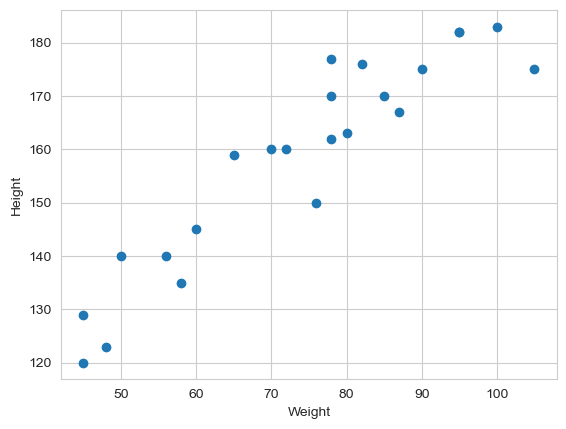

In [7]:
# scatter plot

plt.scatter(x="Weight",y="Height",data=df)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
# check the correlation of the data
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


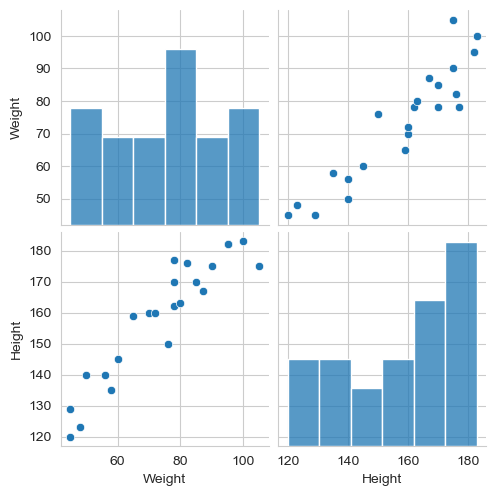

In [9]:
#pair plot
sns.pairplot(df)

In [10]:
# independent and dependent features
x=df[['Weight']] ## independent features should be data frame or 2 dimensional array
y=df['Height'] ## dependent features should be series or 1 dimensional array

In [11]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# standardized the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) # fit and transform the data
x_test=scaler.transform(x_test) # transform the data

In [13]:
# apply the simple linear regression
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression(n_jobs=-1)
linear_model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [14]:
# check slop and intercept
print("coefficient or slop:",linear_model.coef_)
print("intercept:", linear_model.intercept_)

coefficient or slop: [17.03440872]
intercept: 157.5


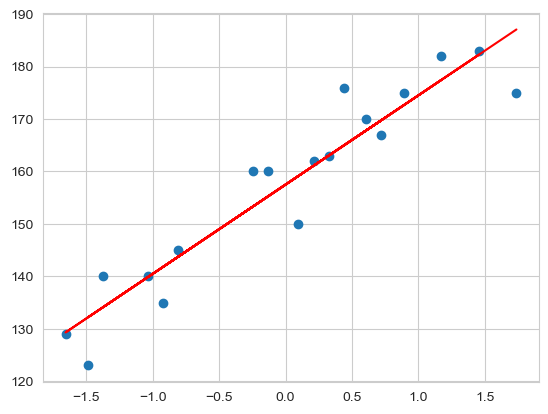

In [15]:
# plot training data plot best fit line
plt .scatter(x_train, y_train)
plt .plot(x_train, linear_model.predict(x_train), color='red')
plt .show()

**prediction of test data**
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5+ 17.0344(X_test)

In [16]:
# prediction for test data
y_pred = linear_model.predict(x_test)
print(y_pred)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


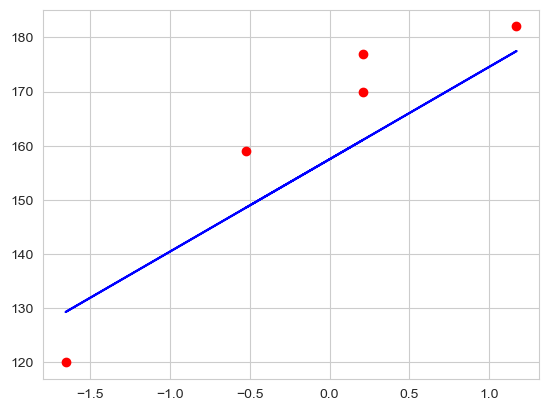

In [17]:
# plot the graph
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.show()

In [18]:
# check the model performance
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np

mse=mean_squared_error(y_test,y_pred) # mean squared error
mae=mean_absolute_error(y_test, y_pred) # mean absolute error
rmse=np.sqrt(mse) # root mean squared error

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  109.77592599051654
MAE:  9.822657814519227
RMSE:  10.477400726827076


**R square**

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [19]:
# r2_score
R2_score=r2_score(y_test,y_pred)
print(f'R2_score: {R2_score}')


R2_score: 0.7769869860423441


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [20]:
#display adjusted R-squared
1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231254